In [2]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import solve_ivp

#import scienceplots

# P4


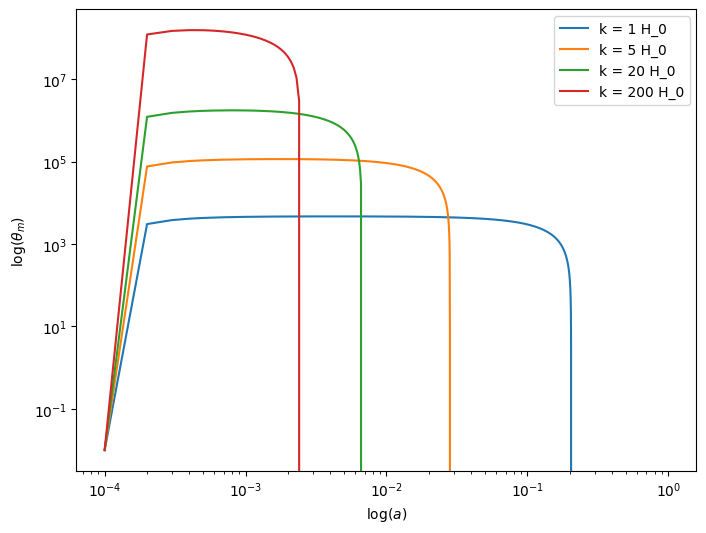

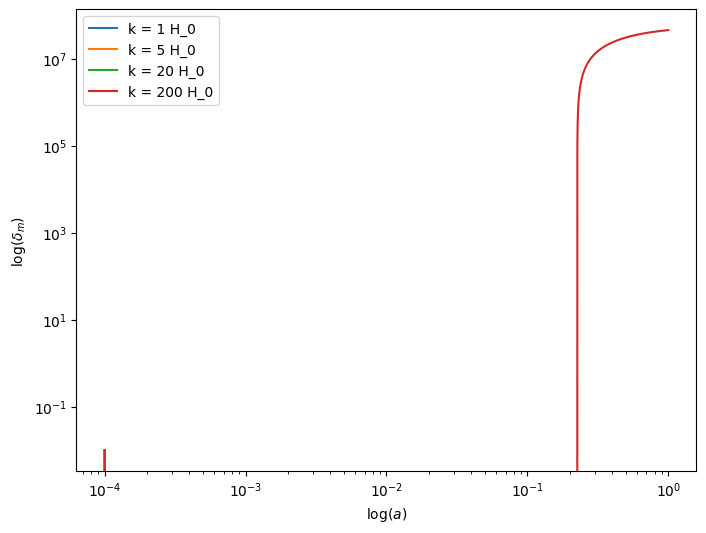

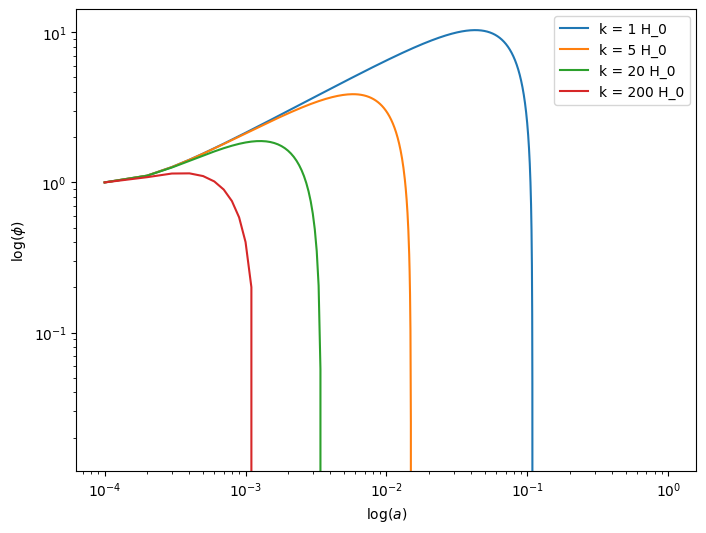

In [15]:
# Definir constantes cosmológicas
H0 = 67  # H0 en Mpc^-1
Omega_r0 = 0
Omega_m0 = 0.3
Omega_L0 = 1 - Omega_r0 - Omega_m0
k_values = [H0, 5*H0,20*H0, 200*H0]  # Diferentes escalas k
delta_lambda = 0

# Función de Hubble en función de 'a' con respecto al tiempo propio
def H(a):
    return H0 * np.sqrt(Omega_m0/a*3 + Omega_L0)

# Función de Hubble en función de 'a' con respecto al tiempo conforme H = a*H_t
def H_prima(a):
    return -3*(H0**2)*Omega_m0/(2*H(a)*(a**4))

#ec 8 delta
def f1(a,theta,delta, phi,k):
    return 3*f4(a,theta,delta, phi,k) - theta/(H(a)*(a**2))

#ec 9 theta
def f2(a,theta,delta, phi,k):
    return (phi*(k**2))/(H(a)*(a**2)) - theta/a

#ec 7 phi
def f3(a,theta,delta, phi,k):
    return ( -3*((a*H0)**2)*0.5*(Omega_m0*(a**-3)*(delta + 3*a*H(a)*theta/(k**2)) + Omega_L0*delta_lambda ))/(k**2)

#ec 7 derivada phi
def f4(a,theta,delta, phi,k):
    A = (3*((a*H0)**2)/(2*(k**2)))*((1 + (9*Omega_m0*(H0**2)/(2*a*(k**2))))**-1)
    B = 3/(k**2)
    return -A*( Omega_m0*( -theta/(H(a)*(a**3)) - delta/(a**2) + 3*phi/(a**2) - B*H(a)*theta/a + B*H_prima(a)*theta ) + 2*Omega_L0*delta_lambda*a )

# Definir el sistema de ecuaciones diferenciales
def perturbations(a, y, k):
    theta, delta , phi = y
    
    # Ecuaciones diferenciales theta,phi,delta,

    dthetada = f2(a,theta,delta, phi,k)
    ddeltada = f1(a,theta,delta, phi,k)
    dphi = f4(a,theta,delta, phi,k)
    return [ dthetada, ddeltada, dphi]

# Condiciones iniciales
a_min = 1e-4
a_max = 1
y0 = [0, 1e-4, 1]  # [theta, delta, phi]

# Resolver las ecuaciones para cada valor de k escala logaritmica
vect_a = np.linspace(a_min, a_max,10000)
solutions = {}

for i, k in enumerate(k_values):

    phi0 = f3(a_min, y0[0], y0[1], 1, k)
    y0 = [0.01, 0.01, 1]
    sol = solve_ivp(perturbations, [a_min, a_max], y0, args=(k,), t_eval=vect_a, method='RK45')

    # Grafico 1: theta_m
    if i == 0:
        fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.loglog(sol.t, sol.y[0], label=f'k = {int(k/H0)} H_0')
    ax1.set_xlabel(r'$\log(a)$')
    ax1.set_ylabel(r'$\log(\theta_m)$')
    ax1.legend()
    
    # Grafico 2: delta_m
    if i == 0:
        fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.loglog(sol.t, sol.y[1], label=f'k = {int(k/H0)} H_0')
    ax2.set_xlabel(r'$\log(a)$')
    ax2.set_ylabel(r'$\log(\delta_m)$')
    ax2.legend()
    
    # Grafico 3: phi
    if i == 0:
        fig3, ax3 = plt.subplots(figsize=(8, 6))
    ax3.loglog(sol.t, sol.y[2], label=f'k = {int(k/H0)} H_0')
    ax3.set_xlabel(r'$\log(a)$')
    ax3.set_ylabel(r'$\log(\phi)$')
    ax3.legend()

# Mostrar todas las figuras
plt.show()


# P5

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


Text(0.5, 0.98, 'Matter Power Spectrum')

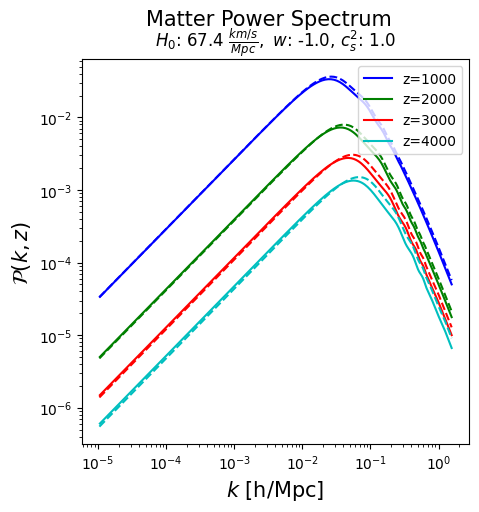

In [19]:
#Parametros cosmologicos:
H0 = 67.4 # km/s/Mpc 
omega_m = 0.315 # parametro de densidad de materia
omega_ch2 = 0.120 # parametro de densidad de materia oscura
omega_bh2 = 0.0224 # parametro de densidad de bariones
ns = 0.965 # indice escalar espectral 
tau = 0.054 #optical depth

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, mnu = 0.6, tau=tau)

# Ahora, para obtener resultados podemos simplemente
results = camb.get_results(pars)

#valores de redshift
z_max = 5000
z_min = 1000
redshifts = np.arange(z_min, z_max, z_max//5)

# set Matter Power Spectrum, para los redshifts que tenemos y un kmax (escala minima)
pars.set_matter_power(redshifts=redshifts, kmax=1)

# Calculamos el matter power spectrum
results = camb.get_results(pars)

# obtenemos el Matter Power Spectrum, kh son los numeros de onda, z reshifts y 
# PK el valor del power spectrum para ese par de kh y z.
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)

pars1 = camb.CAMBparams()
# ELiminamos el parametro de densidad masiva de los neutrinos
pars1.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2,mnu = 0, tau=tau) ##num_massive_neutrinos = 0

# Ahora, para obtener resultados podemos simplemente
results1 = camb.get_results(pars1)

# set Matter Power Spectrum, para los redshifts que tenemos y un kmax (escala minima)
pars1.set_matter_power(redshifts=redshifts, kmax=1)

# Calculamos el matter power spectrum
results1 = camb.get_results(pars1)

# obtenemos el Matter Power Spectrum, kh son los numeros de onda, z reshifts y 
# PK el valor del power spectrum para ese par de kh y z.
kh1, z1, PK1 = results1.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)

### GRAFICAMOS ###
fig, ax = plt.subplots(figsize=(5, 5))
colors=['b', 'g', 'r', 'c','m']
for iz, redshift in enumerate(redshifts):
    ax.loglog(kh, PK[iz, :], label=f"z={redshift}", color = colors[iz])
    ax.loglog(kh1, PK1[iz, :], color = colors[iz], linestyle = '--')

plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

fig.suptitle("Matter Power Spectrum", fontsize=15)

# P6
Cambiamos densidades de materia

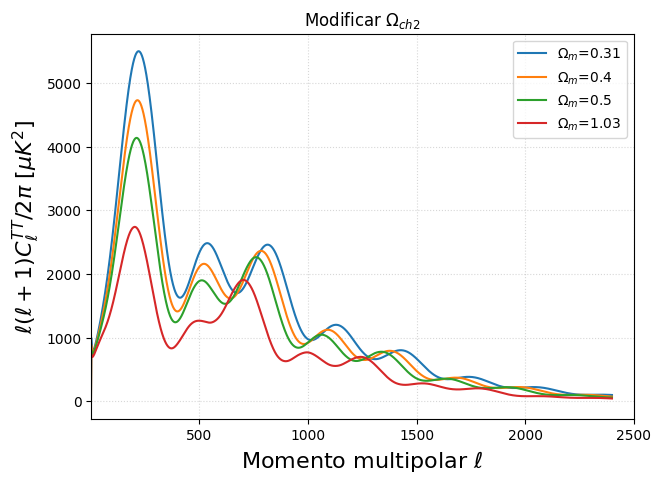

In [6]:
#Parametros cosmologicos:
H0 = 67.4 # km/s/Mpc 
omega_m = 0.315 # parametro de densidad de materia
omega_ch2 = np.array([0.120, 0.16, 0.205, 0.45]) # parametro de densidad de materia oscura
omega_bh2 = 0.0224 # parametro de densidad de bariones
ns = 0.965 # indice escalar espectral 
tau = 0.054 #optical depth

N = 4
om_m = np.zeros(N)
vect_ells =[]
vect_unlensedCL = []
for i in range(N):
    om_m[i] = (omega_bh2 + omega_ch2[i])/((H0/100)**2)

# Creamos un objeto donde guardaremos los parámetros cosmológicos
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=omega_bh2, omch2=omega_ch2[i], tau=tau)

# Ahora, para obtener resultados podemos simplemente
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']

    vect_ells.append(np.arange(unlensedCL[:, 0].shape[0]))
    vect_unlensedCL.append(unlensedCL[:, 0])

om_m = ((om_m*100)//1)/100
#ploteo del primer parametro:
plt.figure(figsize=(7, 5))
plt.plot(vect_ells[0], vect_unlensedCL[0], label=r'$\Omega _m$=' + f'{om_m[0]}')  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(vect_ells[1], vect_unlensedCL[1], label=r'$\Omega _m$=' + f'{om_m[1]}')  # 0: TT, 1: EE, 2: BB, 3: TE 
plt.plot(vect_ells[2], vect_unlensedCL[2], label=r'$\Omega _m$=' + f'{om_m[2]}')  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(vect_ells[3], vect_unlensedCL[3], label=r'$\Omega _m$=' + f'{om_m[3]}')  # 0: TT, 1: EE, 2: BB, 3: TE

plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()
plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.title(r'Modificar $ \Omega_{ch2} $')
plt.show()

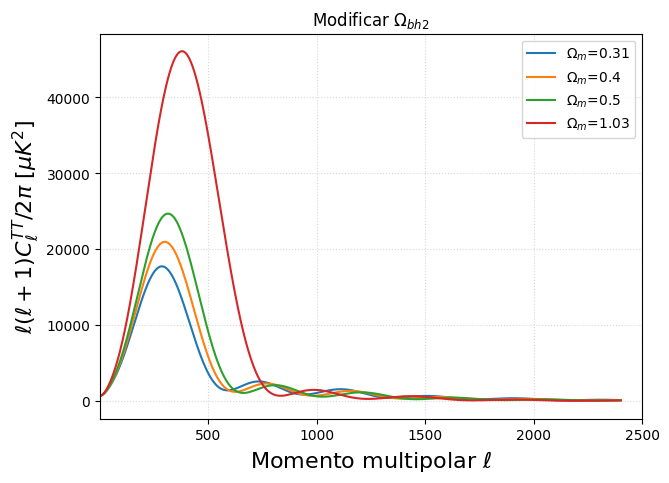

In [10]:
#Parametros cosmologicos:
H0 = 67.4 # km/s/Mpc 
omega_m = 0.315 # parametro de densidad de materia
omega_ch2 = 0.0224 # parametro de densidad de materia oscura
omega_bh2 = np.array([0.120, 0.16, 0.205, 0.45]) # parametro de densidad de bariones
ns = 0.965 # indice escalar espectral 
tau = 0.054 #optical depth


N = 4
om_m = np.zeros(N)
vect_ells =[]
vect_unlensedCL = []
for i in range(N):
    om_m[i] = (omega_bh2[i] + omega_ch2)/((H0/100)**2)

# Creamos un objeto donde guardaremos los parámetros cosmológicos
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=omega_bh2[i], omch2=omega_ch2, tau=tau)

# Ahora, para obtener resultados podemos simplemente
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']

    vect_ells.append(np.arange(unlensedCL[:, 0].shape[0]))
    vect_unlensedCL.append(unlensedCL[:, 0])

om_m = ((om_m*100)//1)/100
#ploteo del primer parametro:
plt.figure(figsize=(7, 5))
plt.plot(vect_ells[0], vect_unlensedCL[0], label=r'$\Omega _m$=' + f'{om_m[0]}')  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(vect_ells[1], vect_unlensedCL[1], label=r'$\Omega _m$=' + f'{om_m[1]}')  # 0: TT, 1: EE, 2: BB, 3: TE 
plt.plot(vect_ells[2], vect_unlensedCL[2], label=r'$\Omega _m$=' + f'{om_m[2]}')  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(vect_ells[3], vect_unlensedCL[3], label=r'$\Omega _m$=' + f'{om_m[3]}')  # 0: TT, 1: EE, 2: BB, 3: TE

plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()
plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.title(r'Modificar $ \Omega_{bh2} $')
plt.show()

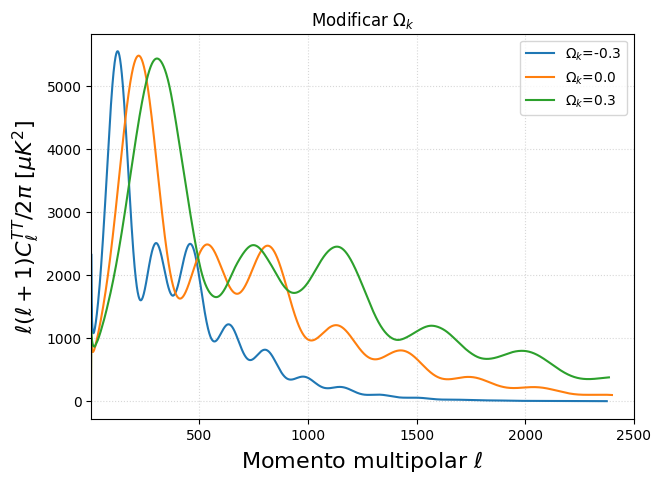

In [11]:

# Parámetros cosmológicos
H0 = 67.4  # km/s/Mpc 
omega_m = 0.315  # parámetro de densidad de materia
omega_ch2 = 0.120  # parámetro de densidad de materia oscura
omega_bh2 = 0.0224  # parámetro de densidad de bariones
Omega_k = np.array([-0.3, 0, 0.3])
ns = 0.965  # índice escalar espectral 
tau = 0.054  # optical depth

# Inicializamos arrays para almacenar los valores
vect_ells = []
vect_unlensedCL = []

for i in range(len(Omega_k)):
    # Configuramos los parámetros cosmológicos
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=Omega_k[i], tau=tau)
    pars.InitPower.set_params( ns=ns)
    
    # Obtenemos resultados
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    # Guardamos el espectro no lenteado (unlensed)
    unlensedCL = powers['unlensed_scalar']
    vect_ells.append(np.arange(unlensedCL.shape[0]))
    vect_unlensedCL.append(unlensedCL[:, 0])

# Ploteamos los resultados
plt.figure(figsize=(7, 5))
for i in range(len(Omega_k)):
    plt.plot(vect_ells[i], vect_unlensedCL[i], label=r'$\Omega _k$=' + f'{Omega_k[i]}')

plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()
plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.title(r'Modificar $ \Omega_{k} $')
plt.show()
